In [4]:
##import the proper libraries
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import warnings 
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


# Bee Loss Exploratory Analysis

In [5]:
##create table of percent loss in the bee population in each state by year
dfLoss = pd.read_csv('Data/Loss.csv')
dfLoss.set_index("State", inplace=True)
dfLoss.head()

2019    2018    2017 2016/17 2015/16 2014/15 2013/14 2012/13  \
State                                                                        
Alabama     43.14%  29.03%  32.14%  34.90%  28.40%  48.00%  44.30%  55.10%   
Arizona     32.01%  51.43%  46.77%  65.00%  40.50%  58.80%  48.50%  21.40%   
Arkansas    17.08%  61.65%  25.48%  39.70%  50.50%  48.30%  29.40%  28.10%   
California  23.31%  39.73%  42.21%  30.50%  39.70%  38.20%  31.70%  45.80%   
Colorado    30.25%  35.39%  36.21%  48.30%  27.80%  38.00%  27.10%  51.30%   

           2011/12 2010/11  
State                       
Alabama     57.70%  84.70%  
Arizona     33.50%  63.60%  
Arkansas    43.50%  26.70%  
California  28.40%  35.70%  
Colorado    37.90%  38.70%

In [6]:
#get row with the averages for every year (located at the bottom of the dataframe, calculated in excel)
seriesLoss = dfLoss.loc['Average']
seriesLoss.sort_index(inplace = True)

def p2f(x):
    """Turns strings into number percentages"""
    return float(x.strip('%'))/100

percentLoss = []
for i in seriesLoss:
    percentLoss.append(p2f(i) *100)
    
percentLoss

[43.97, 34.26, 44.27, 39.35, 45.51, 43.07, 41.27, 33.45, 35.45, 24.66]

Text(0.5, 1.0, 'Bee Loss Percentage')

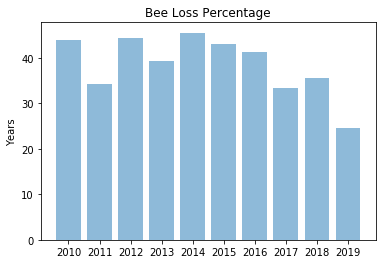

In [7]:
#creates a year vector for plotting
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
#plots bee loss each year
y_pos = np.arange(len(years))
plt.bar(years, percentLoss, align='center', alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('Years')
plt.title('Bee Loss Percentage')

Text(0.5, 1.0, 'Bee Loss Percentage')

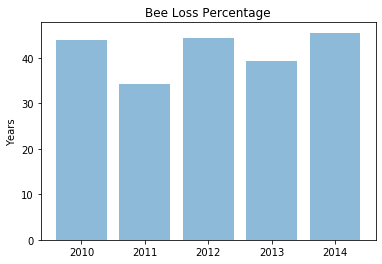

In [8]:
#create smaller graph for years 2010-2014 for presentation to show how it was growing but then changed
editedLoss = percentLoss[:5]
editedYears = years[:5]

y_pos1 = np.arange(len(editedYears))
plt.bar(editedYears, editedLoss, align='center', alpha=0.5)
plt.xticks(y_pos1, editedYears)
plt.ylabel('Years')
plt.title('Bee Loss Percentage')

### Create graph for colonies infected with different things by year (not used in presentation)

In [9]:
#read in data about infections for years 2016, 2017, 2018, 2019 and puts into seperate dataframes
df2016 = pd.read_csv('Data/data2016.csv')
df2017 = pd.read_csv('Data/data2017.csv')
df2018 = pd.read_csv('Data/data2018.csv')
df2019 = pd.read_csv('Data/data2019.csv')

df2016.set_index("State", inplace=True)
df2017.set_index("State", inplace=True)
df2018.set_index("State", inplace=True)
df2019.set_index("State", inplace=True)

In [10]:
#name colums
df2016 = df2016[['mites', 'pest_par', 'disease', 'pesticides', 'other']]
df2017 = df2017[['mites', 'pest_par', 'disease', 'pesticides', 'other']]
df2018 = df2018[['mites', 'pest_par', 'disease', 'pesticides', 'other']]
df2019 = df2019[['mites', 'pest_par', 'disease', 'pesticides', 'other']]


In [11]:
#calculate mean of every state by category
df2016.loc['mean'] = df2016.mean()
df2017.loc['mean'] = df2017.mean()
df2018.loc['mean'] = df2018.mean()
df2019.loc['mean'] = df2019.mean()

#get mean row from every data frame
s2016 = df2016.loc['mean']
s2017 = df2017.loc['mean']
s2018 = df2018.loc['mean']
s2019 = df2019.loc['mean']

#create dataframe of the mean rows
dfBugs = pd.concat([s2016, s2017, s2018, s2019], axis=1)
dfBugs.columns = ['2016', '2017', '2018', '2019']
dfBugs

2016       2017       2018       2019
mites       25.667778  27.510000  29.510000  33.866667
pest_par     9.364444   8.976667   9.717778  12.981111
disease      2.550000   2.901111   3.225556   3.225556
pesticides   6.547778   5.961111   5.513333   7.245556
other        4.884444   5.012222   6.947778   6.927778

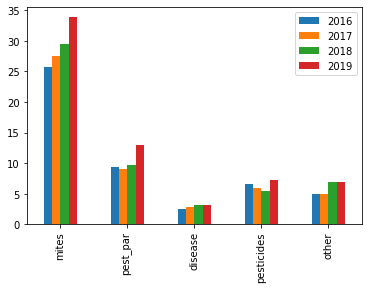

In [12]:
#plot the mean infections by year
dfBugs.plot.bar()

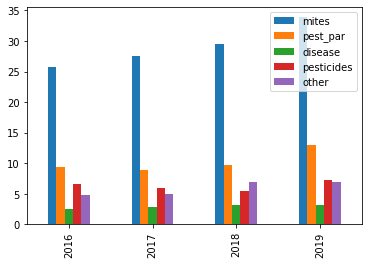

In [13]:
#creates same graph but transposed
dfT = dfBugs.T
dfT.plot.bar()

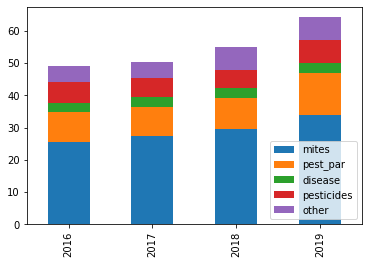

In [14]:
#same information but in a stacked graph
dfT.plot.bar(stacked=True);

# Climate and Temperature Exploration

In [15]:
#read in tmeperature data
df_temp = pd.read_csv('Data/temperature.csv')
df_temp.head()

StateCode  Year  Month    PCP  TAVG  PDSI  PHDI  ZNDX  PMDI  CDD  HDD  SP01  \
0   Alabama  1980      1   5.50  46.7  2.27  2.27  0.30  1.53   12  616  0.34   
1   Alabama  1980      2   2.45  42.7  1.32  1.32 -2.15 -0.27    1  659 -1.52   
2   Alabama  1980      3  13.81  52.6  3.26  3.26  6.22  3.26   13  429  2.45   
3   Alabama  1980      4   7.65  60.6  3.74  3.74  2.45  3.74   24  171  1.20   
4   Alabama  1980      5   7.07  70.2  4.35  4.35  2.99  4.35  170   28  1.46   

   SP02  SP03  SP06  SP09  SP12  SP24  TMIN  TMAX  
0 -0.69  0.00  0.40  0.44  1.31  0.53  37.6  55.8  
1 -0.84 -1.47 -0.05 -0.05  0.88  0.57  30.8  54.7  
2  1.47  1.40  0.67  1.44  1.69  1.49  41.0  64.2  
3  2.46  1.73  1.27  1.48  1.35  1.83  47.5  73.7  
4  1.68  2.62  1.43  1.81  1.69  1.79  59.2  81.1

In [16]:
#read in honey data
df_pest_with_honey=pd.read_csv('Data/pesticide_honey.csv')
df_pest_with_honey.head()

state   numcol  yieldpercol  totalprod    stocks  priceperlb  prodvalue  \
0    AL  16000.0         58.0   928000.0   28000.0        0.69   640000.0   
1    AL  15000.0         64.0   960000.0   96000.0        0.87   835000.0   
2    AL  14000.0         66.0   924000.0   92000.0        0.81   748000.0   
3    AL  16000.0         71.0  1136000.0  159000.0        0.72   818000.0   
4    AL  17000.0         68.0  1156000.0  185000.0        0.56   647000.0   

   year StateName Region  ...  Unnamed: 16373  Unnamed: 16374  Unnamed: 16375  \
0  1995   Alabama  South  ...             NaN             NaN             NaN   
1  1996   Alabama  South  ...             NaN             NaN             NaN   
2  1997   Alabama  South  ...             NaN             NaN             NaN   
3  1998   Alabama  South  ...             NaN             NaN             NaN   
4  1999   Alabama  South  ...             NaN             NaN             NaN   

   Unnamed: 16376  Unnamed: 16377  Unnamed: 16378  Unnamed: 16379  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   Unnamed: 16380  Unnamed: 16381  Unnamed: 16382  
0             NaN             NaN             NaN  
1             NaN             NaN             NaN  
2             NaN             NaN             NaN  
3             NaN             NaN      1662072.45  
4             NaN             NaN      1610168.47  

[5 rows x 16383 columns]

In [17]:
df_bees=df_pest_with_honey[['StateName','numcol','year']]
df_bees.head()

StateName   numcol  year
0   Alabama  16000.0  1995
1   Alabama  15000.0  1996
2   Alabama  14000.0  1997
3   Alabama  16000.0  1998
4   Alabama  17000.0  1999

In [18]:
#temperature data from 1995 to 2018
df_temp=df_temp[(df_temp['Year']>=1995)&(df_temp['Year']<=2018)]
df_temp=df_temp.replace('Oregan','Oregon')

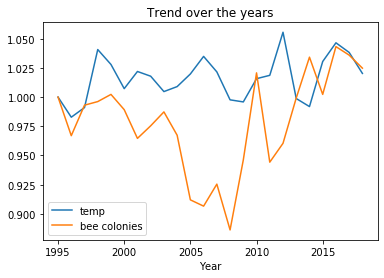

In [19]:
#bee population data normalized w.r.t first year data
df_pop_yr=df_bees.groupby(['year'])['numcol'].sum()
df_pop_yr_norm = df_pop_yr/df_pop_yr.iloc[0]
# df_pop_yr_norm = (df_pop_yr-df_pop_yr.min())/(df_pop_yr.max()-df_pop_yr.min())

#temp data normalized w.r.t. forst year
df_temp_yr=df_temp.groupby(['Year'])['TAVG'].mean()
df_temp_yr_norm=df_temp_yr/df_temp_yr.iloc[0]
# df_temp_yr_norm=(df_temp_yr-df_temp_yr.min())/(df_temp_yr.max()-df_temp_yr.min())

#plot trends of bee colonies and temperature data over the years
plt.plot(df_temp_yr_norm,label='temp')
plt.plot(df_pop_yr_norm,label='bee colonies')
plt.xlabel('Year')
plt.title('Trend over the years')
plt.legend(loc='best')

In [20]:
#run regressopm tp see if there is any statistical correlation between temp and bees
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = df_temp_yr.values.reshape(-1,1)
y = df_pop_yr.values.reshape(-1,1)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
#no correlation

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.2379
Date:                Thu, 05 Dec 2019   Prob (F-statistic):              0.631
Time:                        18:31:16   Log-Likelihood:                -312.04
No. Observations:                  24   AIC:                             628.1
Df Residuals:                      22   BIC:                             630.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.936e+06   1.25e+06      1.547      0.1

In [21]:
#finding high loss and low loss states (1995-2018)
df_pop=df_bees.groupby(['StateName','year'])['numcol'].sum().unstack(1).reset_index()
df_pop['% change']=(df_pop[2018]-df_pop[1995])/df_pop[1995]
low_loss_list=list(df_pop.sort_values(by='% change',ascending=False)[:5]['StateName'])
high_loss_list=list(df_pop.sort_values(by='% change')[:5]['StateName'])

In [22]:
high_loss_list,low_loss_list

(['Kansas', 'Alabama', 'Missouri', 'New Mexico', 'Virginia'],
 ['North Dakota', 'Oregon', 'New Jersey', 'Texas', 'Montana'])

### State Level Average Temperature Analysis

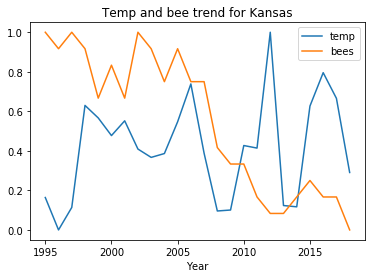

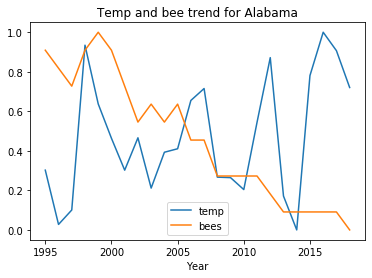

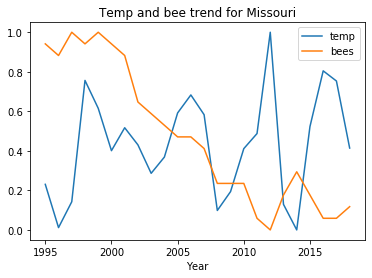

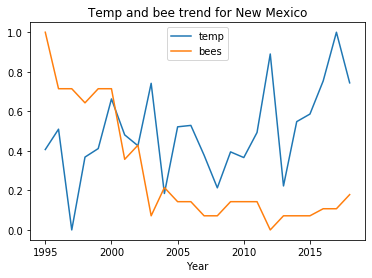

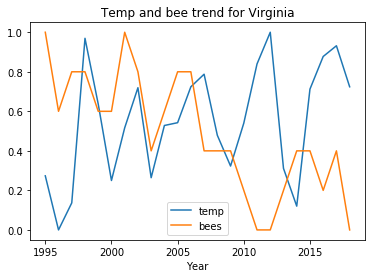

In [23]:
#high loss states - temp and bee trend over the years
def plot_state_high(state):
  df_temp_state=df_temp[df_temp['StateCode']==state].groupby('Year')['TAVG'].mean()
  df_bees_state = df_bees[df_bees['StateName']==state].groupby('year')['numcol'].sum()
  df_temp_state_norm = (df_temp_state-df_temp_state.min())/(df_temp_state.max()-df_temp_state.min())
  df_bees_state_norm = (df_bees_state-df_bees_state.min())/(df_bees_state.max()-df_bees_state.min())
  plt.plot(df_temp_state_norm,label='temp')
  plt.plot(df_bees_state_norm,label='bees')
  plt.xlabel('Year')
  plt.title('Temp and bee trend for '+str(state))
  plt.legend(loc='best')

for state in high_loss_list:
  plot_state_high(state)
  plt.show()

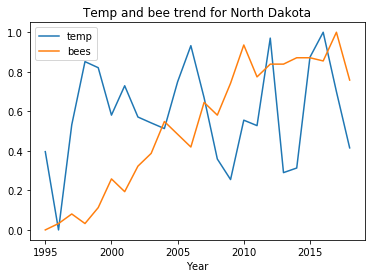

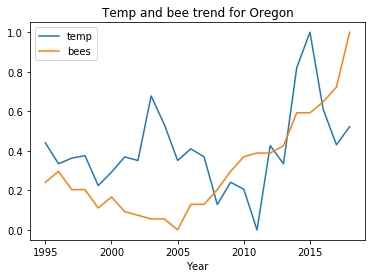

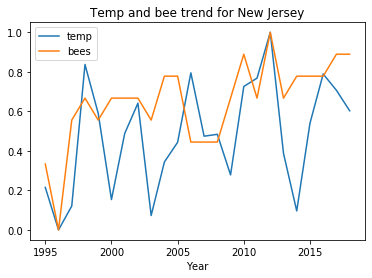

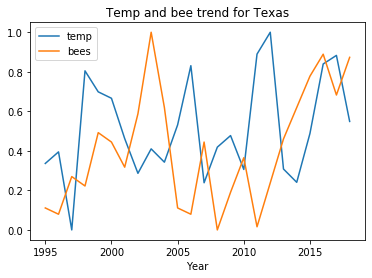

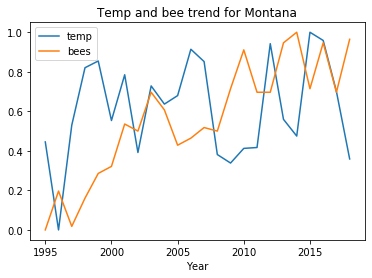

In [24]:
#low loss states - temp and bee trend over the years
def plot_state_low(state):
  df_temp_state=df_temp[df_temp['StateCode']==state].groupby('Year')['TAVG'].mean()
  df_bees_state = df_bees[df_bees['StateName']==state].groupby('year')['numcol'].sum()
  df_temp_state_norm = (df_temp_state-df_temp_state.min())/(df_temp_state.max()-df_temp_state.min())
  df_bees_state_norm = (df_bees_state-df_bees_state.min())/(df_bees_state.max()-df_bees_state.min())
  plt.plot(df_temp_state_norm,label='temp')
  plt.plot(df_bees_state_norm,label='bees')
  plt.xlabel('Year')
  plt.title('Temp and bee trend for '+str(state))
  plt.legend(loc='best')

for state in low_loss_list:
  plot_state_low(state)
  plt.show()

In [25]:
# creating function for plotting every month for the high loss states
df_temp_mon=df_temp.groupby(['StateCode','Month'])['TAVG'].mean().unstack(1).reset_index()
def plot_month_high(i):       # function for plotting
  df_check=df_temp[df_temp['Month']==i]
  for j in range(0,5):   #states loop
    df_check2=df_check[df_check['StateCode']==high_loss_list[j]]
    plt.plot(df_check2['Year'],df_check2['TAVG'],label=high_loss_list[j])
  plt.xlabel('Years')
  plt.ylabel('TAVG')
  plt.title('Month-wise temperature- Month '+str(i))
  plt.legend(loc='best')

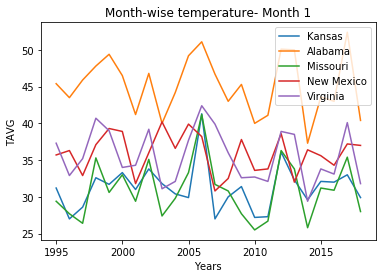

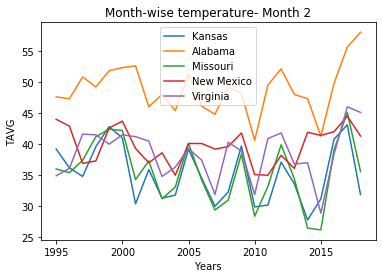

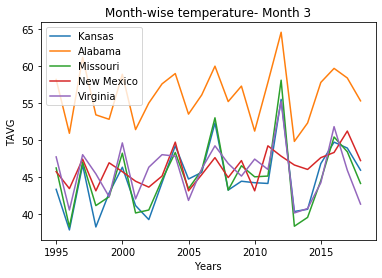

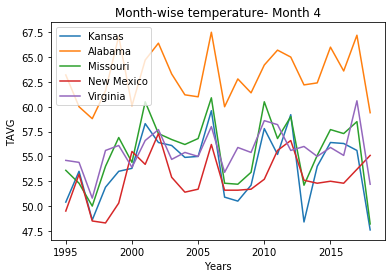

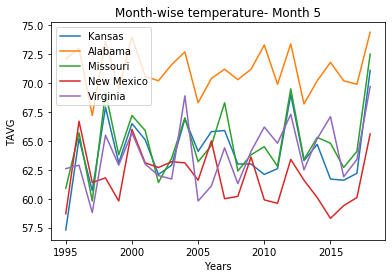

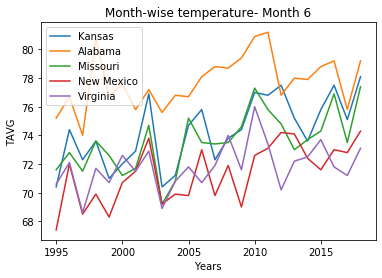

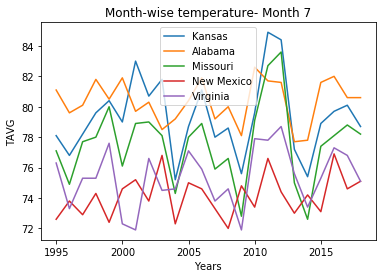

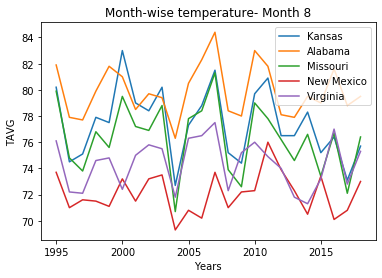

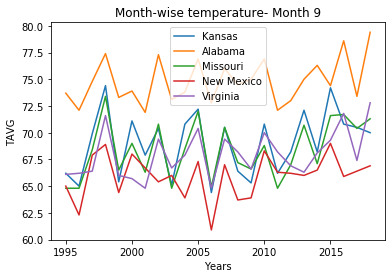

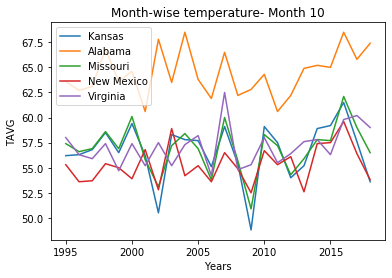

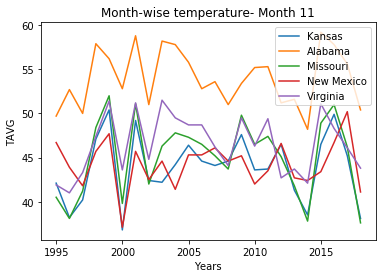

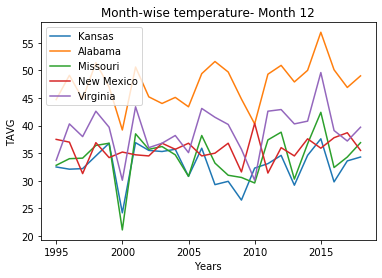

In [26]:
for i in range(1,13):
  plot_month_high(i)
  plt.show()

In [27]:
# create function for plotting every month for the low loss states
df_temp_mon=df_temp.groupby(['StateCode','Month'])['TAVG'].mean().unstack(1).reset_index()
def plot_month_low(i):       # function for plotting
  df_check=df_temp[df_temp['Month']==i]
  for j in range(0,5):   #states loop
    df_check2=df_check[df_check['StateCode']==low_loss_list[j]]
    plt.plot(df_check2['Year'],df_check2['TAVG'],label=low_loss_list[j])
  plt.xlabel('Years')
  plt.ylabel('TAVG')
  plt.title('Month-wise temperature- Month '+str(i))
  plt.legend(loc='best')

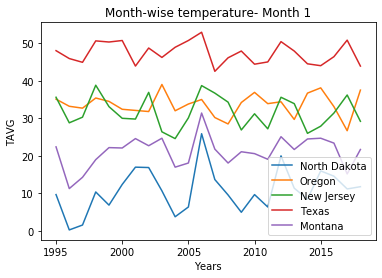

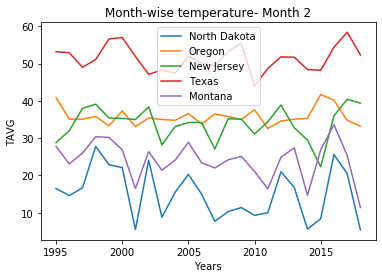

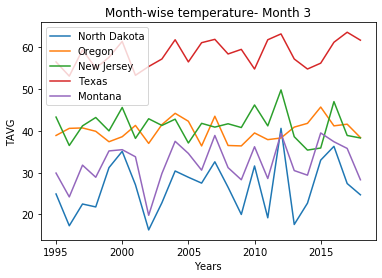

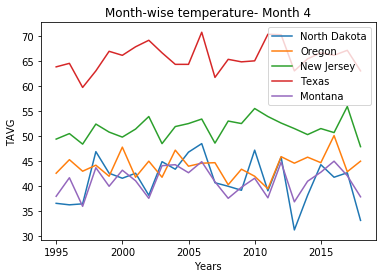

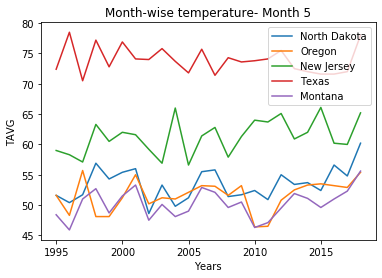

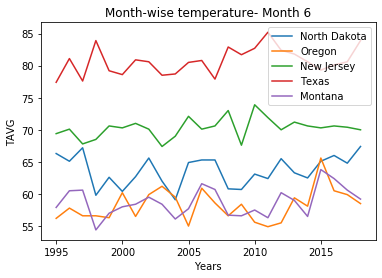

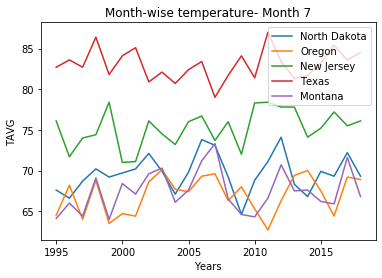

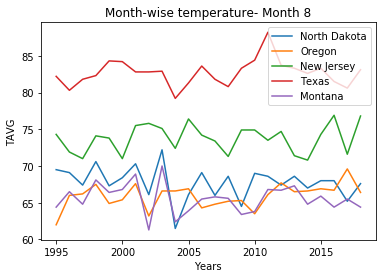

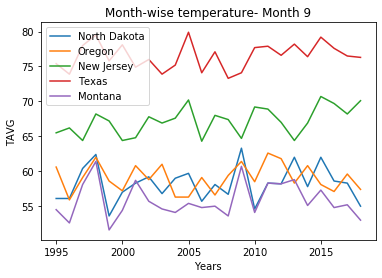

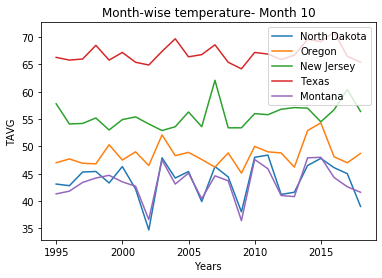

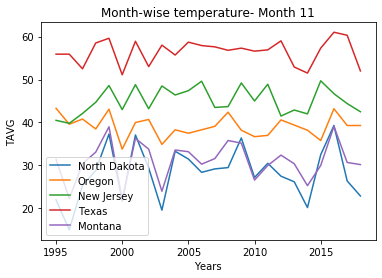

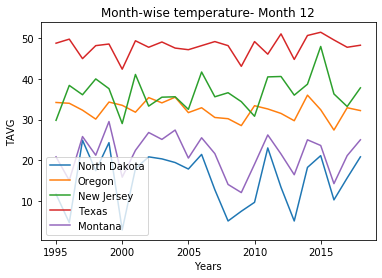

In [28]:
for i in range(1,13):
  plot_month_low(i)
  plt.show()

# Precipitation Analysis

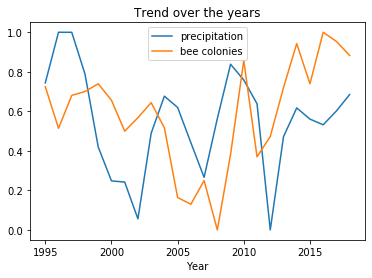

In [29]:
#bee population data normalized 
df_pop_yr=df_bees.groupby(['year'])['numcol'].sum()
df_pop_yr_norm = (df_pop_yr-df_pop_yr.min())/(df_pop_yr.max()-df_pop_yr.min())

#temp data normalized w.r.t. first year
df_temp_yr=df_temp.groupby(['Year'])['PDSI'].mean()
df_temp_yr_norm=(df_temp_yr-df_temp_yr.min())/(df_temp_yr.max()-df_temp_yr.min())

#plot trends of bee colonies and precipitation data over the years
plt.plot(df_temp_yr_norm,label='precipitation')
plt.plot(df_pop_yr_norm,label='bee colonies')
plt.xlabel('Year')
plt.title('Trend over the years')
plt.legend(loc='best')

In [30]:
#running regression on rain data
X = df_temp_yr.values.reshape(-1,1)
y = df_pop_yr.values.reshape(-1,1)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.6056
Date:                Thu, 05 Dec 2019   Prob (F-statistic):              0.445
Time:                        18:31:29   Log-Likelihood:                -311.84
No. Observations:                  24   AIC:                             627.7
Df Residuals:                      22   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.543e+06   2.31e+04    110.032      0.0

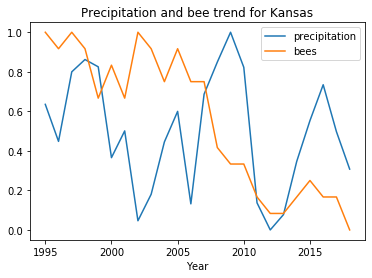

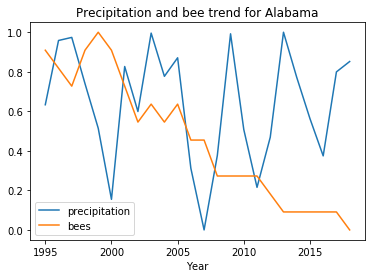

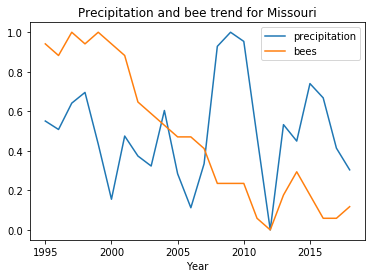

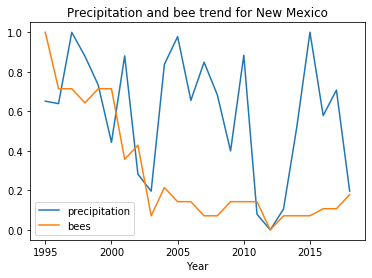

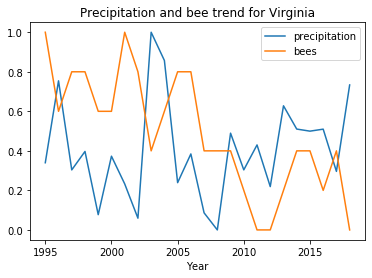

In [74]:
#high loss states - Precipitation and bee trend over the years
def plot_state_high(state):
  df_temp_state=df_temp[df_temp['StateCode']==state].groupby('Year')['PDSI'].mean()
  df_bees_state = df_bees[df_bees['StateName']==state].groupby('year')['numcol'].sum()
  df_temp_state_norm = (df_temp_state-df_temp_state.min())/(df_temp_state.max()-df_temp_state.min())
  df_bees_state_norm = (df_bees_state-df_bees_state.min())/(df_bees_state.max()-df_bees_state.min())
  plt.plot(df_temp_state_norm,label='precipitation')
  plt.plot(df_bees_state_norm,label='bees')
  plt.xlabel('Year')
  plt.title('Precipitation and bee trend for '+str(state))
  plt.legend(loc='best')

for state in high_loss_list:
  plot_state_high(state)
  plt.show()

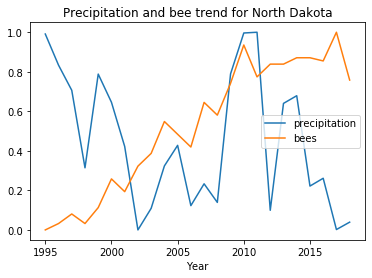

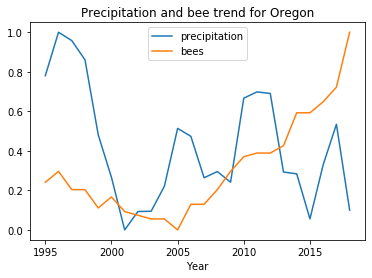

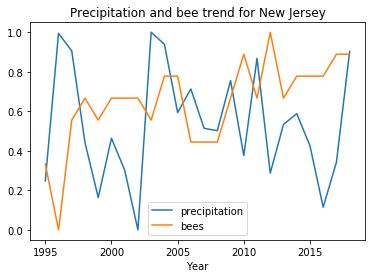

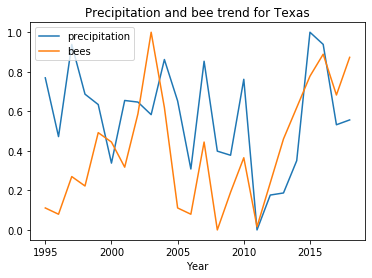

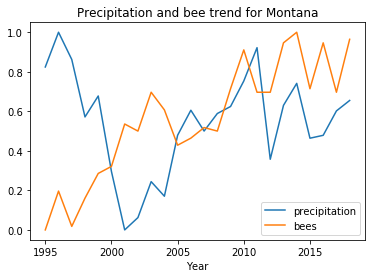

In [75]:
#low loss states - precipitation and bee trend over the years
def plot_state_low(state):
  df_temp_state=df_temp[df_temp['StateCode']==state].groupby('Year')['PDSI'].mean()
  df_bees_state = df_bees[df_bees['StateName']==state].groupby('year')['numcol'].sum()
  df_temp_state_norm = (df_temp_state-df_temp_state.min())/(df_temp_state.max()-df_temp_state.min())
  df_bees_state_norm = (df_bees_state-df_bees_state.min())/(df_bees_state.max()-df_bees_state.min())
  plt.plot(df_temp_state_norm,label='precipitation')
  plt.plot(df_bees_state_norm,label='bees')
  plt.xlabel('Year')
  plt.title('Precipitation and bee trend for '+str(state))
  plt.legend(loc='best')

for state in low_loss_list:
  plot_state_high(state)
  plt.show()

In [76]:
#function for plotting PDSI for every month for the high loss states

df_pres_mon=df_temp.groupby(['StateCode','Month'])['PDSI'].mean().unstack(1).reset_index()
def plot_p_month_high(i):       # function for plotting
  df_check=df_temp[df_temp['Month']==i]
  for j in range(0,5):   #states loop
    df_check2=df_check[df_check['StateCode']==high_loss_list[j]]
    plt.plot(df_check2['Year'],df_check2['PDSI'],label=high_loss_list[j])
  plt.xlabel('Years')
  plt.ylabel('PDSI')
  plt.title('Month-wise PDSI - Month '+str(i))
  plt.legend(loc='best')

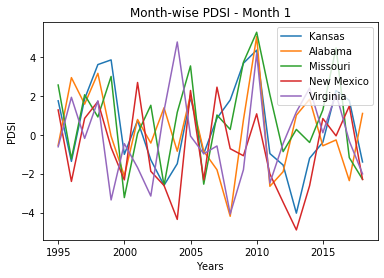

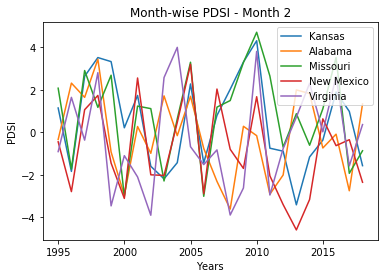

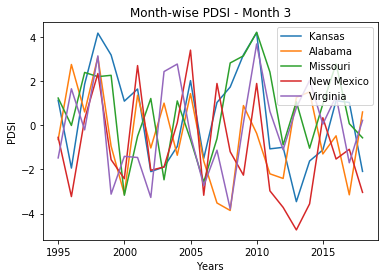

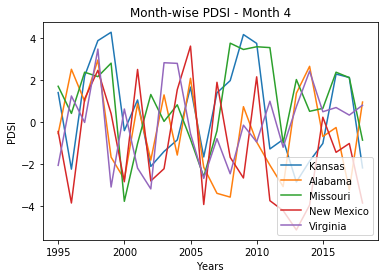

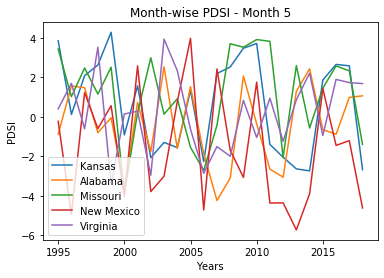

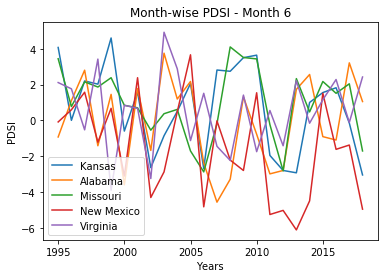

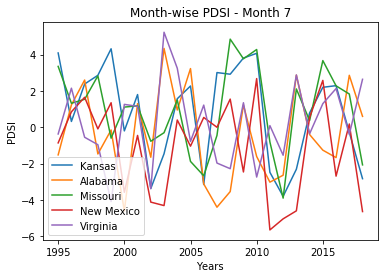

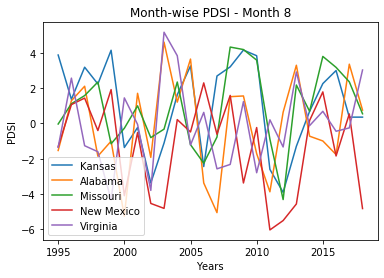

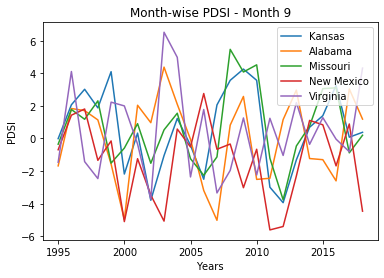

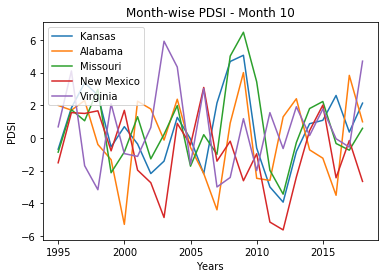

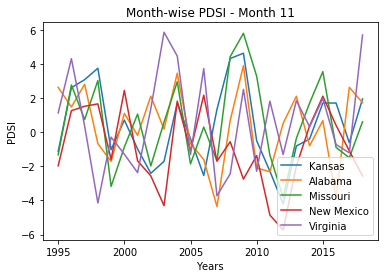

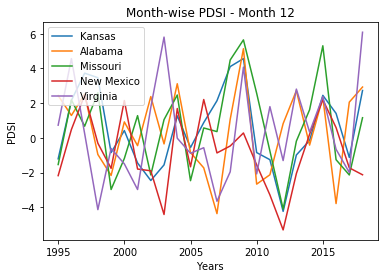

In [77]:
#Plotting the monthly level PDSI graphs
for i in range(1,13):
  plot_p_month_high(i)
  plt.show()

In [35]:
# function for plotting PDSI for every month for the low loss states

df_pres_mon=df_temp.groupby(['StateCode','Month'])['PDSI'].mean().unstack(1).reset_index()
def plot_p_month_low(i):       # function for plotting
  df_check=df_temp[df_temp['Month']==i]
  for j in range(0,5):   #states loop
    df_check2=df_check[df_check['StateCode']==low_loss_list[j]]
    plt.plot(df_check2['Year'],df_check2['PDSI'],label=low_loss_list[j])
  plt.xlabel('Years')
  plt.ylabel('PDSI')
  plt.title('Month-wise PDSI - Month '+str(i))
  plt.legend(loc='best')

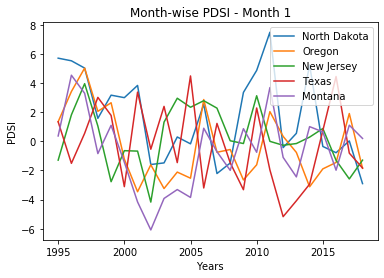

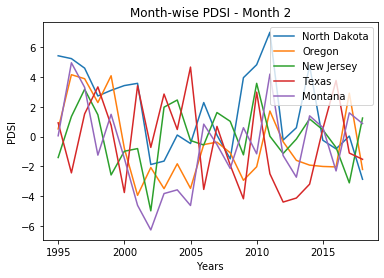

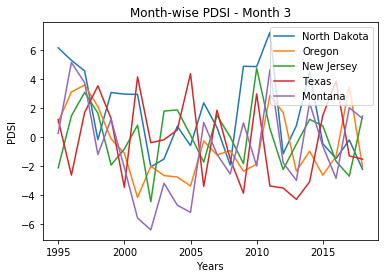

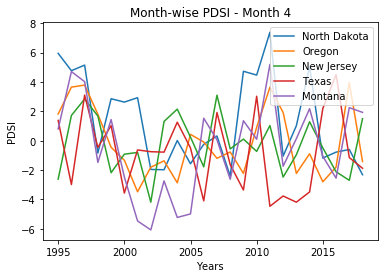

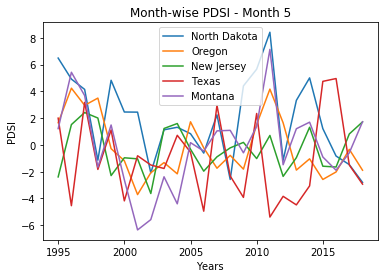

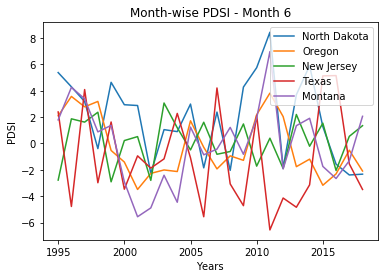

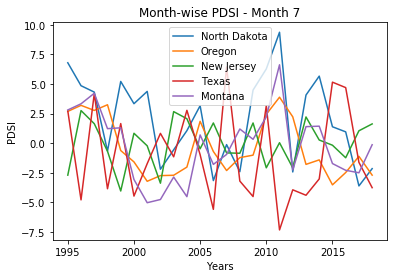

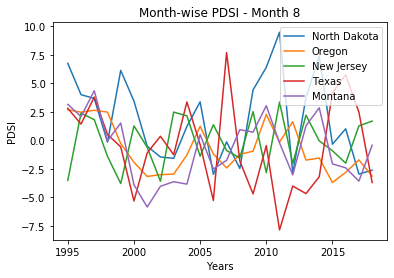

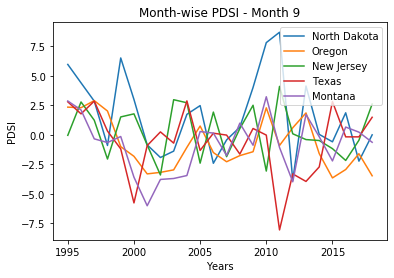

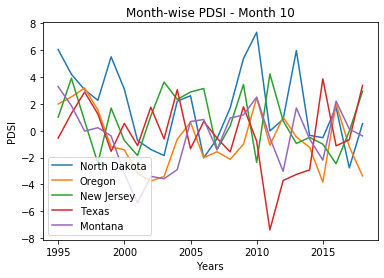

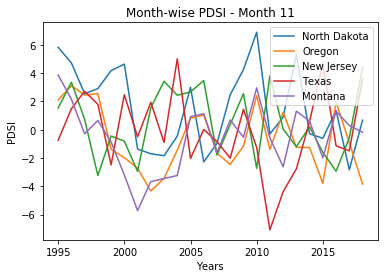

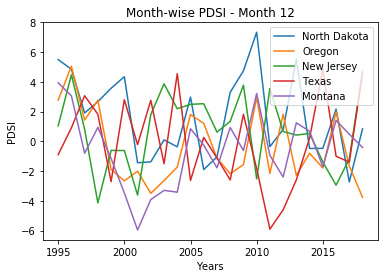

In [36]:
for i in range(1,13):
  plot_p_month_low(i)
  plt.show()

### Temperature Minumum for Anamoly Detection

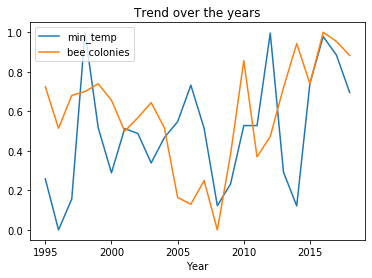

In [78]:
#bee data already normalized and used above

#temp data normalized w.r.t. forst year
df_temp_yr=df_temp.groupby(['Year'])['TMIN'].mean()
df_temp_yr_norm=(df_temp_yr-df_temp_yr.min())/(df_temp_yr.max()-df_temp_yr.min())

#plot trends of bee colonies and minimum temperature data over the years
plt.plot(df_temp_yr_norm,label='min_temp')
plt.plot(df_pop_yr_norm,label='bee colonies')
plt.xlabel('Year')
plt.title('Trend over the years')
plt.legend(loc='best')

In [38]:
#running regression on minimum temperature data
X = df_temp_yr.values.reshape(-1,1)
y = df_pop_yr.values.reshape(-1,1)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9714
Date:                Thu, 05 Dec 2019   Prob (F-statistic):              0.335
Time:                        18:31:41   Log-Likelihood:                -311.65
No. Observations:                  24   AIC:                             627.3
Df Residuals:                      22   BIC:                             629.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.539e+06   1.02e+06      1.507      0.1

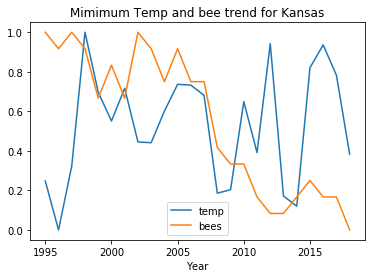

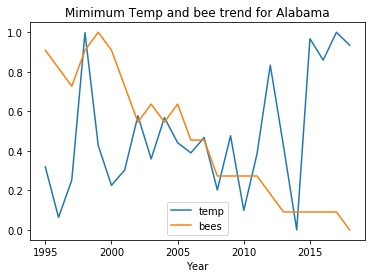

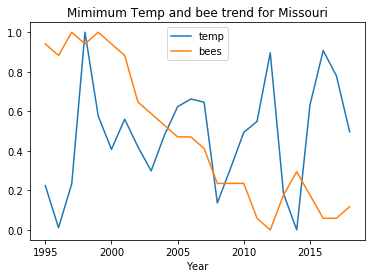

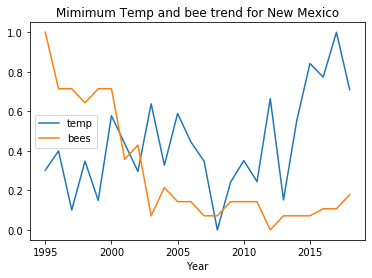

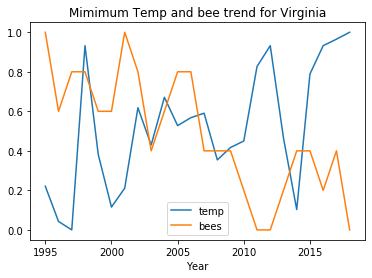

In [79]:
#high loss states - Minimum temp and bee trend over the years
def plot_state_high(state):
  df_temp_state=df_temp[df_temp['StateCode']==state].groupby('Year')['TMIN'].mean()
  df_bees_state = df_bees[df_bees['StateName']==state].groupby('year')['numcol'].sum()
  df_temp_state_norm = (df_temp_state-df_temp_state.min())/(df_temp_state.max()-df_temp_state.min())
  df_bees_state_norm = (df_bees_state-df_bees_state.min())/(df_bees_state.max()-df_bees_state.min())
  plt.plot(df_temp_state_norm,label='temp')
  plt.plot(df_bees_state_norm,label='bees')
  plt.xlabel('Year')
  plt.title('Mimimum Temp and bee trend for '+str(state))
  plt.legend(loc='best')

for state in high_loss_list:
  plot_state_high(state)
  plt.show()

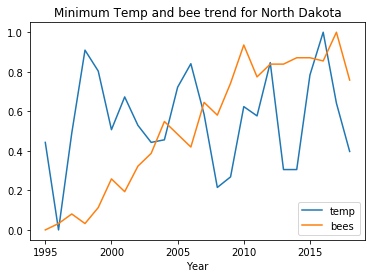

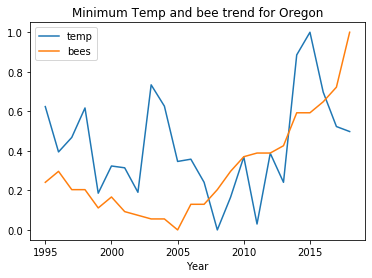

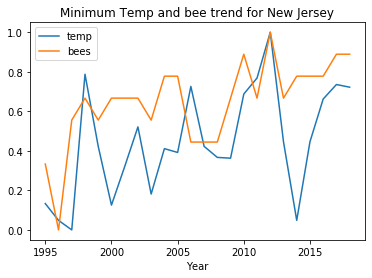

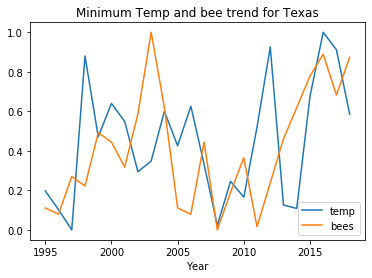

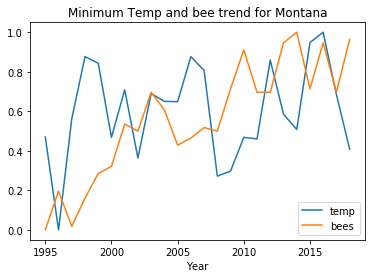

In [80]:
#low loss states - Mimimum temp and bee trend over the years
def plot_state_low(state):
  df_temp_state=df_temp[df_temp['StateCode']==state].groupby('Year')['TMIN'].mean()
  df_bees_state = df_bees[df_bees['StateName']==state].groupby('year')['numcol'].sum()
  # df_temp_state_norm = df_temp_state/df_temp_state.iloc[0]
  # df_bees_state_norm = df_bees_state/df_bees_state.iloc[0]
  df_temp_state_norm = (df_temp_state-df_temp_state.min())/(df_temp_state.max()-df_temp_state.min())
  df_bees_state_norm = (df_bees_state-df_bees_state.min())/(df_bees_state.max()-df_bees_state.min())
  plt.plot(df_temp_state_norm,label='temp')
  plt.plot(df_bees_state_norm,label='bees')
  plt.xlabel('Year')
  plt.title('Minimum Temp and bee trend for '+str(state))
  plt.legend(loc='best')

for state in low_loss_list:
  plot_state_low(state)
  plt.show()

In [41]:
#plotting TMIN for every month for the high loss states

df_pres_mon=df_temp.groupby(['StateCode','Month'])['TMIN'].min().unstack(1).reset_index()
def plot_tmin_month_high(i):       # function for plotting
  df_check=df_temp[df_temp['Month']==i]
  for j in range(0,5):   #states loop
    df_check2=df_check[df_check['StateCode']==high_loss_list[j]]
    plt.plot(df_check2['Year'],df_check2['TMIN'],label=high_loss_list[j])
  plt.xlabel('Years')
  plt.ylabel('TMIN')
  plt.title('Month-wise TMIN - Month '+str(i))
  plt.legend(loc='best')

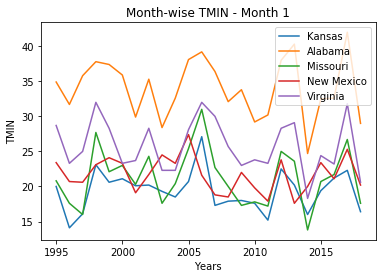

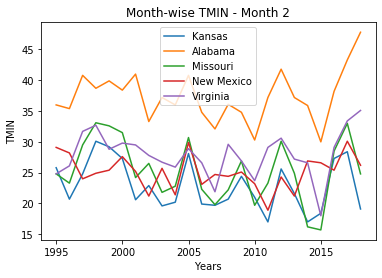

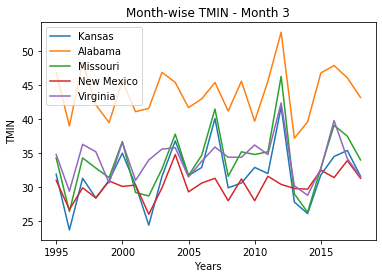

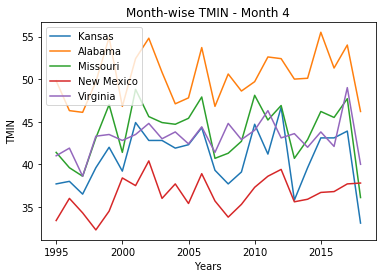

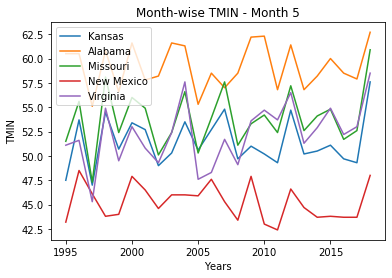

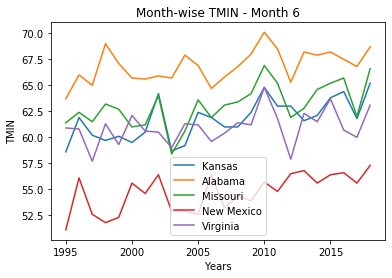

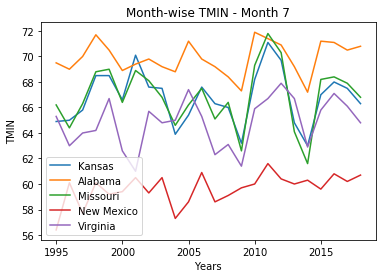

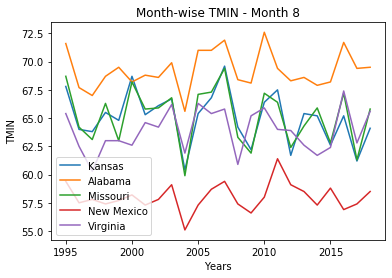

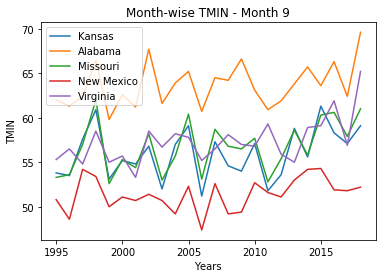

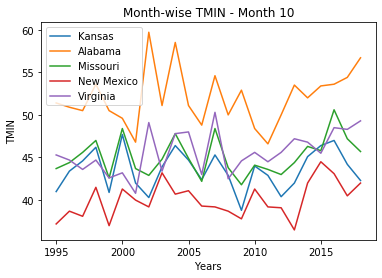

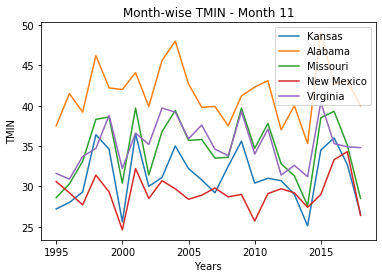

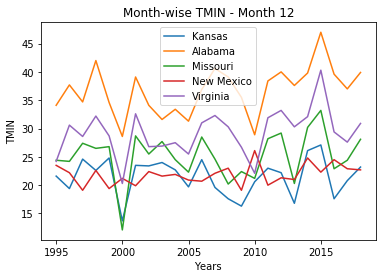

In [42]:
#Plotting the monthly level TMIN graphs

for i in range(1,13):
  plot_tmin_month_high(i)
  plt.show()

In [43]:
#plotting TMIN for every month for the low loss states

df_pres_mon=df_temp.groupby(['StateCode','Month'])['TMIN'].min().unstack(1).reset_index()
def plot_tmin_month_low(i):       # function for plotting
  df_check=df_temp[df_temp['Month']==i]
  for j in range(0,5):   #states loop
    df_check2=df_check[df_check['StateCode']==low_loss_list[j]]
    plt.plot(df_check2['Year'],df_check2['TMIN'],label=low_loss_list[j])
  plt.xlabel('Years')
  plt.ylabel('TMIN')
  plt.title('Month-wise TMIN - Month '+str(i))
  plt.legend(loc='best')

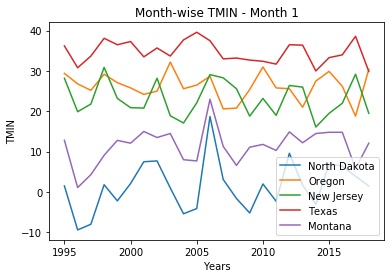

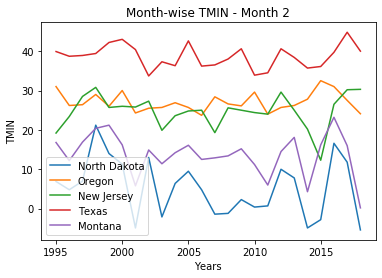

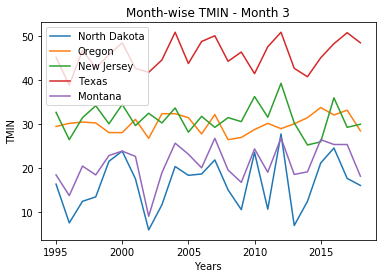

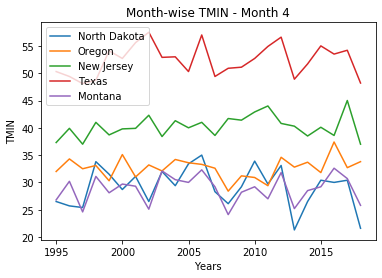

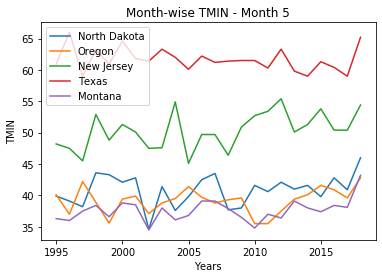

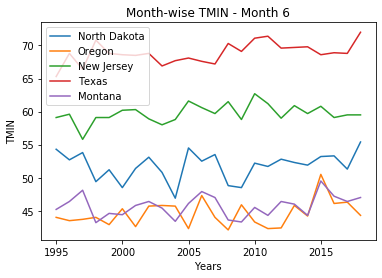

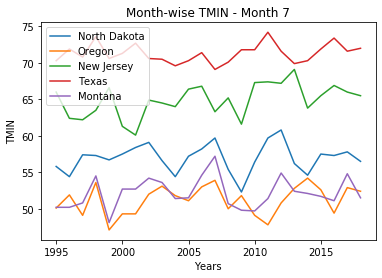

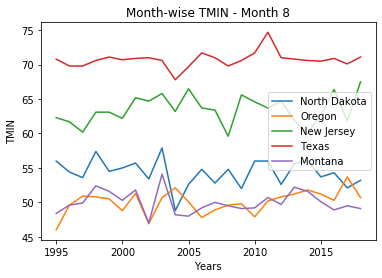

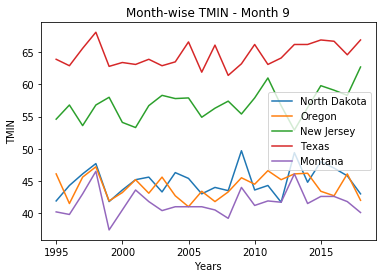

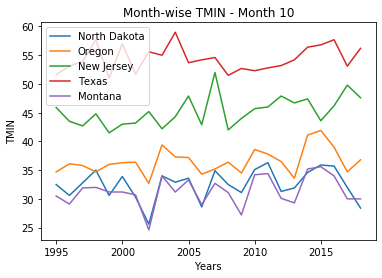

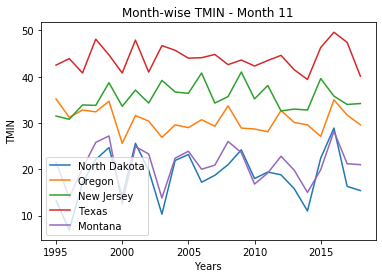

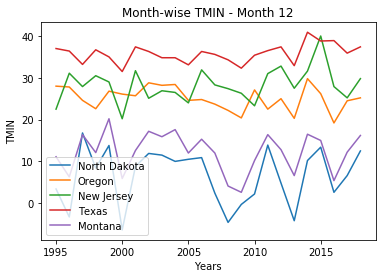

In [44]:
for i in range(1,13):
  plot_tmin_month_low(i)
  plt.show()

# Agriculture Output Analysis

In [45]:
#read in agriculture data
df_agr=pd.read_csv('Data/agriculture.csv')
df_agr.head()
df_agr['Year']

0     1998
1     1999
2     2000
3     2001
4     2002
5     2003
6     2004
7     2005
8     2006
9     2007
10    2008
11    2009
12    2010
13    2011
14    2012
15    2013
16    2014
17    2015
18    2016
19    2017
Name: Year, dtype: int64

In [46]:
#run regression on spinach data
df_agr.columns[2:]
X = np.array(df_agr['Col'].dropna()).reshape(-1, 1)
y = np.array(df_agr['Spinach'].dropna()).reshape(-1, 1)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.133
Date:                Thu, 05 Dec 2019   Prob (F-statistic):              0.301
Time:                        18:31:54   Log-Likelihood:                -240.94
No. Observations:                  20   AIC:                             485.9
Df Residuals:                      18   BIC:                             487.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.572e+05   2.09e+05      2.661      0.0

In [47]:
#run regression on rice data
df_agr.columns[2:]
X = np.array(df_agr['Col'].dropna()).reshape(-1, 1)
y = np.array(df_agr['Rice'].dropna()).reshape(-1, 1)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.055
Method:                 Least Squares   F-statistic:                  0.001213
Date:                Thu, 05 Dec 2019   Prob (F-statistic):              0.973
Time:                        18:31:54   Log-Likelihood:                -299.64
No. Observations:                  20   AIC:                             603.3
Df Residuals:                      18   BIC:                             605.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.468e+06   3.94e+06      2.402      0.0

In [48]:
#run regression on almond data
df_agr.columns[2:]
X = np.array(df_agr['Col'].dropna()).reshape(-1, 1)
y = np.array(df_agr['Almonds'].dropna()).reshape(-1, 1)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.437
Date:                Thu, 05 Dec 2019   Prob (F-statistic):              0.246
Time:                        18:31:54   Log-Likelihood:                -266.30
No. Observations:                  20   AIC:                             536.6
Df Residuals:                      18   BIC:                             538.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.288e+05   7.44e+05     -0.173      0.8

In [49]:
#run regression on apples
df_agr.columns[2:]
X = np.array(df_agr['Col'].dropna()).reshape(-1, 1)
y = np.array(df_agr['Apples'].dropna()).reshape(-1, 1)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     8.667
Date:                Thu, 05 Dec 2019   Prob (F-statistic):            0.00868
Time:                        18:31:54   Log-Likelihood:                -283.90
No. Observations:                  20   AIC:                             571.8
Df Residuals:                      18   BIC:                             573.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.235e+05   1.79e+06     -0.403      0.6

([<matplotlib.axis.XTick at 0x2590b206400>,
 <a list of 21 Text xticklabel objects>)

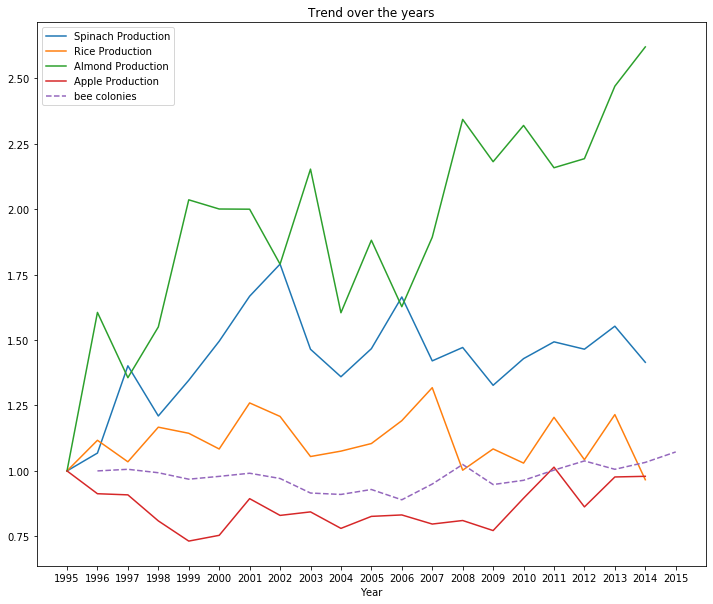

In [50]:
#Creating Relative Columns to ensure the scale of the plot

df_agr['rel_Spinach'] = df_agr['Spinach']/df_agr['Spinach'].iloc[0]
df_agr['rel_Rice'] = df_agr['Rice']/df_agr['Rice'].iloc[0]
df_agr['rel_Almonds'] = df_agr['Almonds']/df_agr['Almonds'].iloc[0]
df_agr['rel_Apples'] = df_agr['Apples']/df_agr['Apples'].iloc[0]

df_agr['rel_Col'] = df_agr['Col']/df_agr['Col'].iloc[0]

#plot trends of bee colonies and temperature data over the years
plt.figure(figsize=(12,10))
plt.plot(range(1995,2015),df_agr['rel_Spinach'],label='Spinach Production')
plt.plot(range(1995,2015),df_agr['rel_Rice'],label='Rice Production')
plt.plot(range(1995,2015),df_agr['rel_Almonds'],label='Almond Production')
plt.plot(range(1995,2015),df_agr['rel_Apples'],label='Apple Production')



plt.plot(range(1996,2016),df_agr['rel_Col'], label='bee colonies',linestyle='--')
plt.xlabel('Year')
plt.title('Trend over the years')
plt.legend(loc='best')
plt.xticks(range(1995,2016))


# Use of Pesticides

In [51]:
df_pest_with_honey.head()

state   numcol  yieldpercol  totalprod    stocks  priceperlb  prodvalue  \
0    AL  16000.0         58.0   928000.0   28000.0        0.69   640000.0   
1    AL  15000.0         64.0   960000.0   96000.0        0.87   835000.0   
2    AL  14000.0         66.0   924000.0   92000.0        0.81   748000.0   
3    AL  16000.0         71.0  1136000.0  159000.0        0.72   818000.0   
4    AL  17000.0         68.0  1156000.0  185000.0        0.56   647000.0   

   year StateName Region  ...  Unnamed: 16373  Unnamed: 16374  Unnamed: 16375  \
0  1995   Alabama  South  ...             NaN             NaN             NaN   
1  1996   Alabama  South  ...             NaN             NaN             NaN   
2  1997   Alabama  South  ...             NaN             NaN             NaN   
3  1998   Alabama  South  ...             NaN             NaN             NaN   
4  1999   Alabama  South  ...             NaN             NaN             NaN   

   Unnamed: 16376  Unnamed: 16377  Unnamed: 16378  Unnamed: 16379  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   Unnamed: 16380  Unnamed: 16381  Unnamed: 16382  
0             NaN             NaN             NaN  
1             NaN             NaN             NaN  
2             NaN             NaN             NaN  
3             NaN             NaN      1662072.45  
4             NaN             NaN      1610168.47  

[5 rows x 16383 columns]

### Number of Colonies from 1995-2018

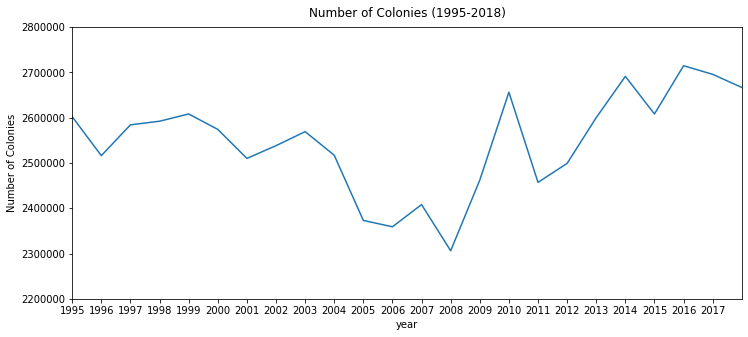

In [52]:
#year numcol grouping
yr_nc_grp = df_pest_with_honey.groupby('year')['numcol'].sum()
yr_nc_grp.plot(figsize=(12,5))
plt.xticks(np.arange(1995, 2018, 1)) 
plt.yticks(np.arange(2200000, 2900000, 100000)) 

pyplot.title('Number of Colonies (1995-2018)', pad=10)
pyplot.ylabel('Number of Colonies', labelpad=None) 
plt.show()

### Neonoc Pesticide Usage from 1995-2016

In [53]:
#for pest analysis
pest_data = pd.read_csv('Data/pest_data.csv')
pest_data[:5]

state   numcol  yieldpercol  totalprod    stocks  priceperlb  prodvalue  \
0    AL  16000.0           58   928000.0   28000.0        0.69     640000   
1    AL  15000.0           64   960000.0   96000.0        0.87     835000   
2    AL  14000.0           66   924000.0   92000.0        0.81     748000   
3    AL  16000.0           71  1136000.0  159000.0        0.72     818000   
4    AL  17000.0           68  1156000.0  185000.0        0.56     647000   

   year StateName Region  nCLOTHIANIDIN  nIMIDACLOPRID  nTHIAMETHOXAM  \
0  1995   Alabama  South            0.0          716.5            0.0   
1  1996   Alabama  South            0.0          371.6            0.0   
2  1997   Alabama  South            0.0         6704.8            0.0   
3  1998   Alabama  South            0.0         1836.3            0.0   
4  1999   Alabama  South            0.0         1251.2            0.0   

   nACETAMIPRID  nTHIACLOPRID  nAllNeonic  
0           0.0           0.0       716.5  
1           0.0           0.0       371.6  
2           0.0           0.0      6704.8  
3           0.0           0.0      1836.3  
4           0.0           0.0      1251.2

Text(0, 0.5, 'Amount of Pesticide Applied (kg)')

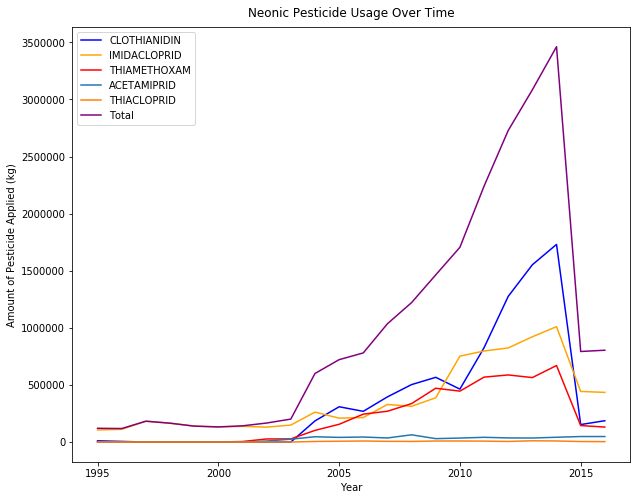

In [54]:

#aggregate all pesticides by year
clo= pest_data.groupby('year')['nCLOTHIANIDIN'].sum()
mida= pest_data.groupby('year')['nIMIDACLOPRID'].sum()
thiam= pest_data.groupby('year')['nTHIAMETHOXAM'].sum()
ace= pest_data.groupby('year')['nACETAMIPRID'].sum()
thia= pest_data.groupby('year')['nTHIACLOPRID'].sum()
Nall= pest_data.groupby('year')['nAllNeonic'].sum()

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Neonic Pesticide Usage Over Time', pad=10)
ax.plot(clo, label='CLOTHIANIDIN', color= 'blue')
ax.plot(mida, label='IMIDACLOPRID', color= 'orange')
ax.plot(thiam, label='THIAMETHOXAM', color= 'red')
ax.plot(ace, label='ACETAMIPRID')
ax.plot(thia, label='THIACLOPRID')
ax.plot(Nall, label='Total', color= 'purple')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Amount of Pesticide Applied (kg)')

### Bee Loss vs Pesticide Usage

In [55]:
beeloss_data = pd.read_csv('Data/col_pctLoss.csv')
beeloss_data

Year  States accounted  Colonies Lost   Total Colonies  Loss percentage  \
0  2010                53      221771.192          611060            36.29   
1  2011                52      219336.452          698560            31.40   
2  2012                52     1410201.755         3008783            46.87   
3  2013                52      928581.362         2750706            33.76   
4  2014                52     1065320.788         2517979            42.31   
5  2015                53      987130.585         2341670            42.15   
6  2016                51      541317.309         1640309            33.00   

   pesticide use (kg)  
0             1705060  
1             2240811  
2             2728079  
3             3084540  
4             3461942  
5              792822  
6              803878

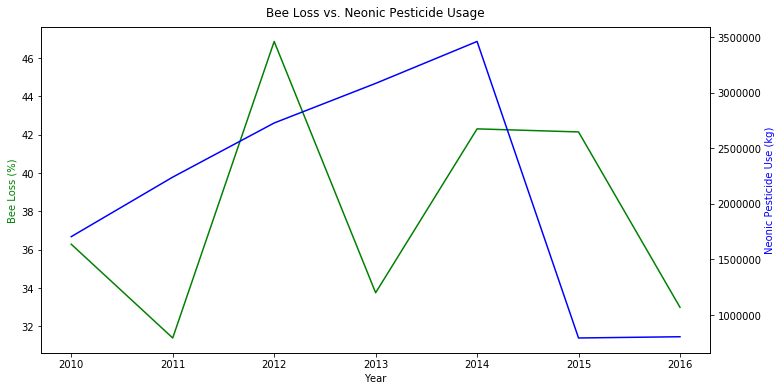

In [56]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_title('Bee Loss vs. Neonic Pesticide Usage', pad=10)

x= beeloss_data['Year']
y1= beeloss_data['Loss percentage']
y2= beeloss_data['pesticide use (kg)']

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Year')
ax1.set_ylabel('Bee Loss (%)', color='g')
ax2.set_ylabel('Neonic Pesticide Use (kg)', color='b')

plt.show()

### Numcol vs Pesticide Usage by State

In [57]:
#subset of data for pesticide usage
dfplot= pest_data[['state','year','numcol','nAllNeonic']].copy()
dfplot[:5]

state  year   numcol  nAllNeonic
0    AL  1995  16000.0       716.5
1    AL  1996  15000.0       371.6
2    AL  1997  14000.0      6704.8
3    AL  1998  16000.0      1836.3
4    AL  1999  17000.0      1251.2

In [58]:
#Greatest average number of colonies from 1995-2016
dfplot.groupby('state')['numcol'].mean().sort_values(ascending = False)[:5]

state
CA    389318.181818
ND    372500.000000
SD    244500.000000
FL    206272.727273
MT    136181.818182
Name: numcol, dtype: float64

In [59]:
#Greatest use of neonics on average
dfplot.groupby('state')['nAllNeonic'].mean().sort_values(ascending = False)[:15]

state
CA    105733.222727
IL     89932.868182
IA     89729.040909
MN     58555.331818
NE     55968.213636
TX     51998.640909
IN     51619.445455
SD     37922.450000
MO     34241.972727
ND     33740.084091
KS     32814.295455
OH     31069.218182
FL     30129.590909
MI     25002.200000
WI     24353.304545
Name: nAllNeonic, dtype: float64

### North Dakota Plot

In [60]:
#ND plot subset
dfplot_ND= dfplot.loc[dfplot['state'] == 'ND']
dfplot_ND[:5]

state  year    numcol  nAllNeonic
462    ND  1995  220000.0    38818.90
463    ND  1996  230000.0    19884.95
464    ND  1997  245000.0      951.00
465    ND  1998  230000.0     2019.40
466    ND  1999  255000.0     7948.80

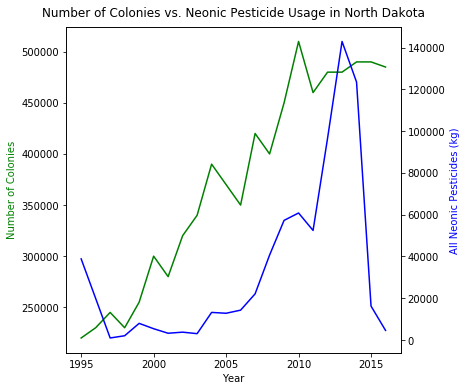

In [61]:
fig, ax1 = plt.subplots(figsize=(6,6))
ax1.set_title('Number of Colonies vs. Neonic Pesticide Usage in North Dakota', pad=10)

x= dfplot_ND['year']
y1= dfplot_ND.groupby('year')['numcol'].sum()
y2= dfplot_ND.groupby('year')['nAllNeonic'].sum()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Colonies', color='g')
ax2.set_ylabel('All Neonic Pesticides (kg)', color='b')

plt.show()

### South Dakota plot

In [62]:
#SD plot subset
dfplot_SD= dfplot.loc[dfplot['state'] == 'SD']
dfplot_SD[:5]

state  year    numcol  nAllNeonic
616    SD  1995  240000.0         0.4
617    SD  1996  240000.0         0.7
618    SD  1997  240000.0        47.0
619    SD  1998  225000.0        29.8
620    SD  1999  224000.0       166.3

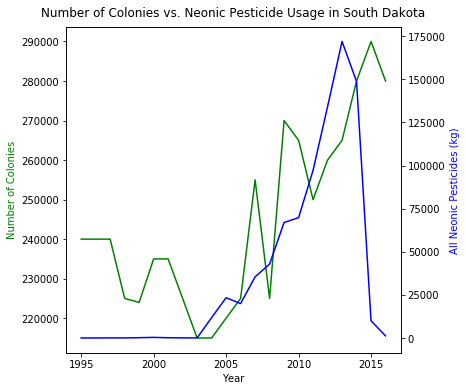

In [63]:
fig, ax1 = plt.subplots(figsize=(6,6))
ax1.set_title('Number of Colonies vs. Neonic Pesticide Usage in South Dakota', pad=10)

x= dfplot_SD['year']
y1= dfplot_SD.groupby('year')['numcol'].sum()
y2= dfplot_SD.groupby('year')['nAllNeonic'].sum()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Colonies', color='g')
ax2.set_ylabel('All Neonic Pesticides (kg)', color='b')

plt.show()

### Montana Plot

In [64]:
#MT plot subset
dfplot_MT= dfplot.loc[dfplot['state'] == 'MT']
dfplot_MT[:5]

state  year    numcol  nAllNeonic
418    MT  1995  106000.0         7.9
419    MT  1996  117000.0        89.0
420    MT  1997  107000.0       128.3
421    MT  1998  115000.0        44.5
422    MT  1999  122000.0       264.2

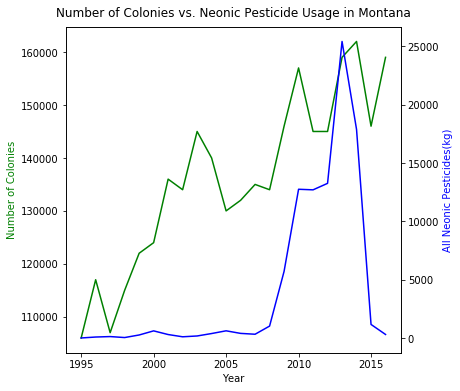

In [65]:
fig, ax1 = plt.subplots(figsize=(6,6))
ax1.set_title('Number of Colonies vs. Neonic Pesticide Usage in Montana', pad=10)

x= dfplot_MT['year']
y1= dfplot_MT.groupby('year')['numcol'].sum()
y2= dfplot_MT.groupby('year')['nAllNeonic'].sum()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Colonies', color='g')
ax2.set_ylabel('All Neonic Pesticides(kg)', color='b')

plt.show()

### Florida Plot

In [66]:
#FL plot subset
dfplot_FL= dfplot.loc[dfplot['state'] == 'FL']
dfplot_FL[:5]

state  year    numcol  nAllNeonic
110    FL  1995  230000.0      4828.5
111    FL  1996  240000.0     12278.0
112    FL  1997  240000.0      9347.5
113    FL  1998  230000.0     11049.1
114    FL  1999  228000.0     11173.8

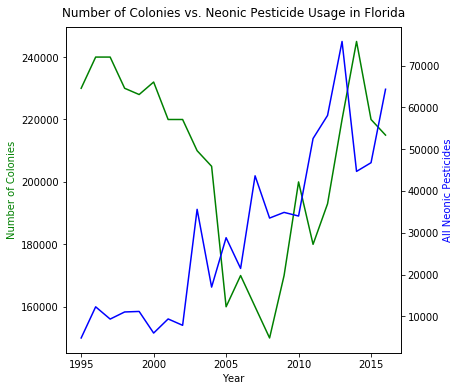

In [67]:
fig, ax1 = plt.subplots(figsize=(6,6))
ax1.set_title('Number of Colonies vs. Neonic Pesticide Usage in Florida', pad=10)

x= dfplot_FL['year']
y1= dfplot_FL.groupby('year')['numcol'].sum()
y2= dfplot_FL.groupby('year')['nAllNeonic'].sum()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Colonies', color='g')
ax2.set_ylabel('All Neonic Pesticides', color='b')

plt.show()

### California Plot

In [68]:
#CA plot subset
dfplot_CA= dfplot.loc[dfplot['state'] == 'CA']
dfplot_CA[:5]

state  year    numcol  nAllNeonic
66    CA  1995  420000.0     28576.6
67    CA  1996  390000.0     33002.7
68    CA  1997  420000.0     76719.6
69    CA  1998  450000.0     61047.2
70    CA  1999  465000.0     41778.9

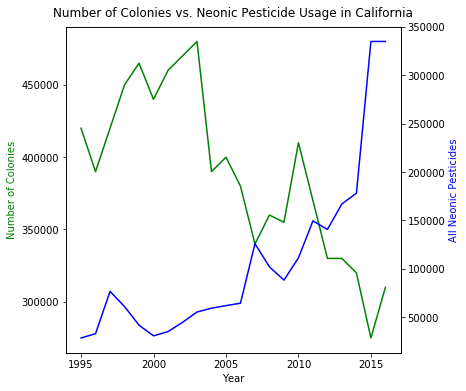

In [69]:
fig, ax1 = plt.subplots(figsize=(6,6))
ax1.set_title('Number of Colonies vs. Neonic Pesticide Usage in California', pad=10)

x= dfplot_CA['year']
y1= dfplot_CA.groupby('year')['numcol'].sum()
y2= dfplot_CA.groupby('year')['nAllNeonic'].sum()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Colonies', color='g')
ax2.set_ylabel('All Neonic Pesticides', color='b')

plt.show()

# Honey Production Exploration

In [70]:
#read in honey data
honey = pd.read_csv('Data/full_honey_production.csv')
honey.head()

state   numcol  yieldpercol  totalprod    stocks  priceperlb  prodvalue  \
0    AL  16000.0           71  1136000.0  159000.0        0.72     818000   
1    AL  17000.0           68  1156000.0  185000.0        0.56     647000   
2    AL  16000.0           78  1248000.0  187000.0        0.59     736000   
3    AL  14000.0           73  1022000.0  235000.0        0.72     736000   
4    AL  12000.0           86  1032000.0  103000.0        1.18    1218000   

   year  
0  1998  
1  1999  
2  2000  
3  2001  
4  2002

### Honey Production

Text(0.5, 1.0, 'U.S. Honey Production (1998-2018)')

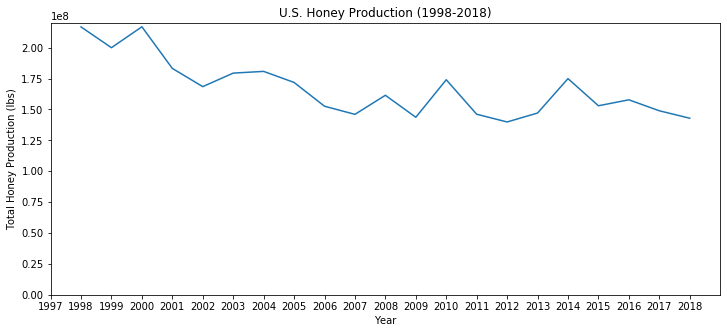

In [71]:
total_prod = honey.groupby(['year']).agg('sum')['totalprod']
plt.figure(figsize=(12,5))
plt.plot(total_prod)
plt.xlabel('Year')
plt.ylabel('Total Honey Production (lbs)')
plt.ylim([0,220000000])
x_ticks = list(np.linspace(1997,2018,num=22,dtype=int))
plt.xticks(x_ticks)
plt.title('U.S. Honey Production (1998-2018)')

### Honey Prices

Text(0.5, 1.0, 'U.S. Honey Prices (1999-2018)')

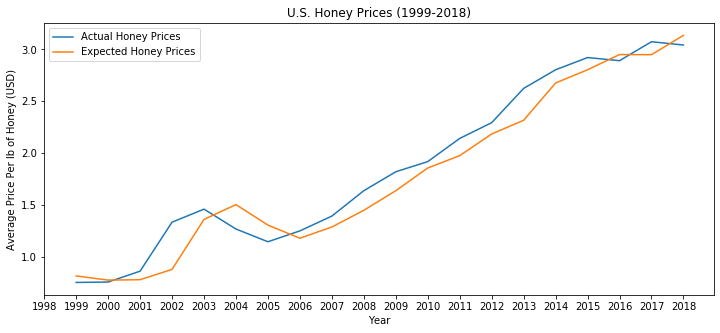

In [72]:
prices = pd.read_csv('Data/inflation_data.csv')
prices_plot = prices[['year','Honey Prices', 'Exp. Honey Price based on inflation']].dropna(how='any',axis=0)
fig = plt.figure(figsize=(12,5))
plt.plot(prices_plot['year'],prices_plot['Honey Prices'], label='Actual Honey Prices')
plt.plot(prices_plot['year'],prices_plot['Exp. Honey Price based on inflation'],label='Expected Honey Prices')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Average Price Per lb of Honey (USD)')
x_ticks = list(np.linspace(1998,2018,num=21,dtype=int))
plt.xticks(x_ticks)
plt.title('U.S. Honey Prices (1999-2018)')